Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the data

In [4]:
df = pd.read_excel('DS - Assignment Part 1 data set.xlsx')
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


EDA

In [5]:
df.shape

(414, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [7]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [8]:
x = df.iloc[:,:8]
x

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491
...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597


In [9]:
y = df.iloc[:,-1:]
y

,House price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


In [10]:
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

VDA

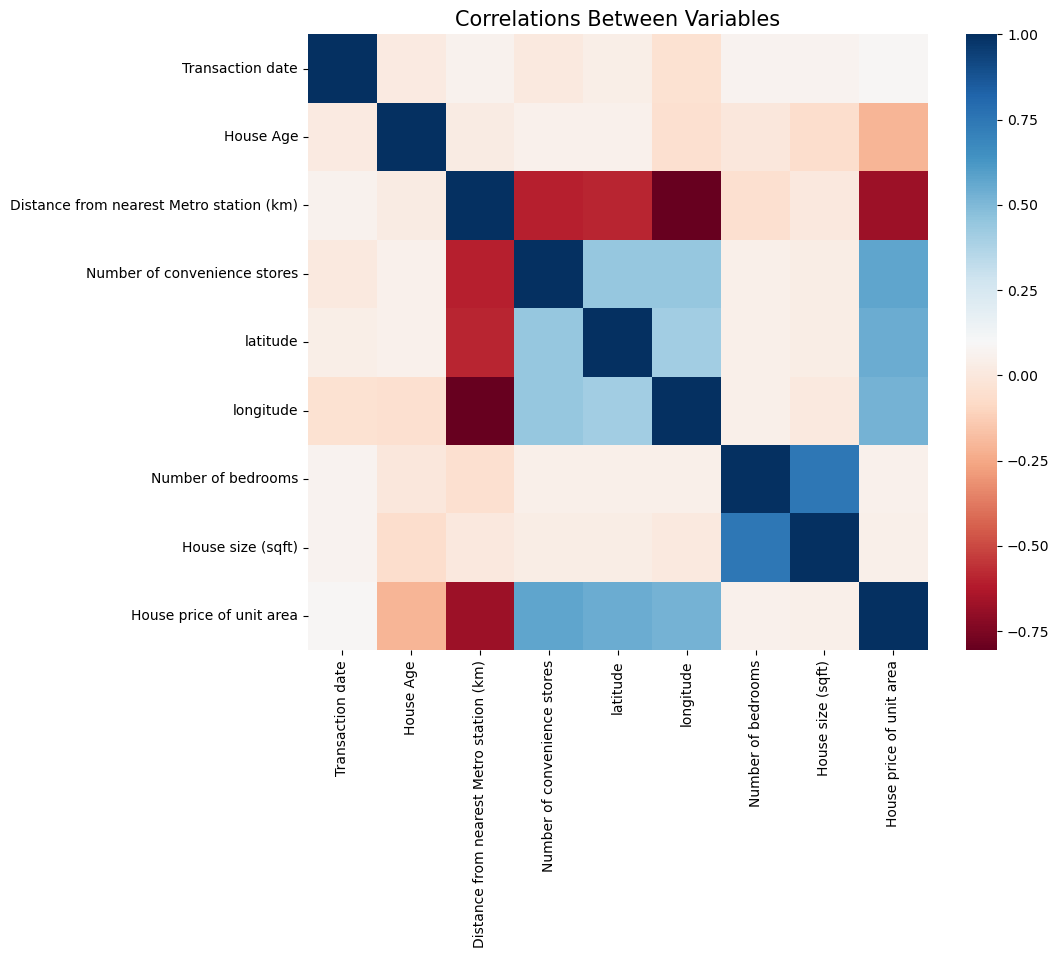

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

Model building

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [13]:
x_train

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
272,2012.750000,13.0,492.2313,5,24.96515,121.53737,3,890
390,2013.500000,32.8,377.8302,9,24.97151,121.54350,2,1438
69,2012.833333,12.5,561.9845,5,24.98746,121.54391,1,581
325,2013.083333,36.6,488.8193,8,24.97015,121.54494,2,1166
199,2013.416667,18.2,451.6419,8,24.96945,121.54490,1,458
...,...,...,...,...,...,...,...,...
343,2013.000000,33.5,563.2854,8,24.98223,121.53597,3,1284
359,2013.500000,5.6,2408.9930,0,24.95505,121.55964,2,876
323,2013.416667,28.6,197.1338,6,24.97631,121.54436,1,594
280,2013.250000,2.3,184.3302,6,24.96581,121.54086,2,1034


In [14]:
y_train.shape

(331, 1)

In [15]:
x_test

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
121,2013.500000,13.6,492.23130,5,24.96515,121.53737,1,443
353,2013.500000,4.1,2147.37600,3,24.96299,121.51284,2,901
96,2013.416667,6.4,90.45606,9,24.97433,121.54310,3,1158
43,2012.750000,34.4,512.78710,6,24.98748,121.54301,1,447
125,2013.166667,1.1,193.58450,6,24.96571,121.54089,2,952
...,...,...,...,...,...,...,...,...
157,2013.250000,16.1,815.93140,4,24.97886,121.53464,1,477
184,2012.750000,14.1,2615.46500,0,24.95495,121.56174,1,442
129,2013.416667,38.5,216.83290,7,24.98086,121.54162,2,1284
357,2013.416667,0.0,338.96790,9,24.96853,121.54413,3,1319


In [16]:
y_test.shape

(83, 1)

In [17]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

In [18]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
lr =  model.score(x_test, y_test)
lr_mae= mean_absolute_error(y_test,y_pred)

In [19]:
model = Ridge()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
ri =  model.score(x_test, y_test)
ri_mae= mean_absolute_error(y_test,y_pred)

In [20]:
model = Lasso()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
la =  model.score(x_test, y_test)
la_mae= mean_absolute_error(y_test,y_pred)

In [21]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
rf =  model.score(x_test, y_test)
rf_mae= mean_absolute_error(y_test,y_pred)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7416\2680046125.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


In [22]:
model = AdaBoostRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
ar =  model.score(x_test, y_test)
ar_mae= mean_absolute_error(y_test,y_pred)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
model = SVR()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
svr =  model.score(x_test, y_test)
svr_mae= mean_absolute_error(y_test,y_pred)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
lModels = ['LinearRegression','RidgeRegression','LassoRegression','RandomForest','ADaBoostRegressor','SVMRegressor']
Model_score = [lr,ri,la,rf,ar,svr]
Mean_absolute_error = [lr_mae,ri_mae,la_mae,rf_mae,ar_mae,svr_mae]


In [25]:
d = {'Model_name':lModels,'Model_score':Model_score,'Mean_absolute_error':Mean_absolute_error}

In [26]:
df = pd.DataFrame(d)
df

,Model_name,Model_score,Mean_absolute_error
0,LinearRegression,0.667641,5.495348
1,RidgeRegression,0.641934,5.769422
2,LassoRegression,0.640079,5.736477
3,RandomForest,0.837000,3.851410
4,ADaBoostRegressor,0.750826,4.878794
5,SVMRegressor,0.550685,5.804246


So here we can see that Random Forest has mininum mean_absolute_error so we can say that this is a best model for our problem statment